In [2]:
import cmath
import math
from matplotlib import pyplot as plt

# Диаметры, ограничивающие перемещение центра масс
D_mass_center_max = 13
D_mass_center_min = 5.8

angular_delta = 15
angle = 90

def real_to_math_yaw(yaw):
    """returns yaw in Degrees"""
    math_yaw = -1 # 360 - yaw
    yaw %= 360
    
    if yaw >= 0 and yaw <= 90:
        math_yaw = 90 - yaw
    elif yaw > 90 and yaw < 180:
        delta = yaw - 90
        math_yaw = 360 - delta
    elif yaw >= 180 and yaw < 270:
        delta = yaw - 180
        math_yaw = 270 - delta
    else:
        delta = yaw - 270
        math_yaw = 180 - delta
        
    return math_yaw


def real_to_math_yaw_2(yaw):
    yaw %= 360
    return (360 + 90 - yaw) % 360


"Test it!"
for i in range(361):
    print("{:2d}:   {:3d}  {:3d} ".format(i, real_to_math_yaw(i), real_to_math_yaw_2(i)))
    

 0:    90   90 
 1:    89   89 
 2:    88   88 
 3:    87   87 
 4:    86   86 
 5:    85   85 
 6:    84   84 
 7:    83   83 
 8:    82   82 
 9:    81   81 
10:    80   80 
11:    79   79 
12:    78   78 
13:    77   77 
14:    76   76 
15:    75   75 
16:    74   74 
17:    73   73 
18:    72   72 
19:    71   71 
20:    70   70 
21:    69   69 
22:    68   68 
23:    67   67 
24:    66   66 
25:    65   65 
26:    64   64 
27:    63   63 
28:    62   62 
29:    61   61 
30:    60   60 
31:    59   59 
32:    58   58 
33:    57   57 
34:    56   56 
35:    55   55 
36:    54   54 
37:    53   53 
38:    52   52 
39:    51   51 
40:    50   50 
41:    49   49 
42:    48   48 
43:    47   47 
44:    46   46 
45:    45   45 
46:    44   44 
47:    43   43 
48:    42   42 
49:    41   41 
50:    40   40 
51:    39   39 
52:    38   38 
53:    37   37 
54:    36   36 
55:    35   35 
56:    34   34 
57:    33   33 
58:    32   32 
59:    31   31 
60:    30   30 
61:    29   29 
62:    2

In [3]:
def math_to_real_yaw_2(m_yaw):
    m_yaw %= 360
    return (360 + 90 - m_yaw) % 360

print("Math angle", "", "Real Yaw")
for i in range(461):
    print("{:2d}:        {:3d}".format(i, math_to_real_yaw_2(i)))

Math angle  Real Yaw
 0:         90
 1:         89
 2:         88
 3:         87
 4:         86
 5:         85
 6:         84
 7:         83
 8:         82
 9:         81
10:         80
11:         79
12:         78
13:         77
14:         76
15:         75
16:         74
17:         73
18:         72
19:         71
20:         70
21:         69
22:         68
23:         67
24:         66
25:         65
26:         64
27:         63
28:         62
29:         61
30:         60
31:         59
32:         58
33:         57
34:         56
35:         55
36:         54
37:         53
38:         52
39:         51
40:         50
41:         49
42:         48
43:         47
44:         46
45:         45
46:         44
47:         43
48:         42
49:         41
50:         40
51:         39
52:         38
53:         37
54:         36
55:         35
56:         34
57:         33
58:         32
59:         31
60:         30
61:         29
62:         28
63:         27
64:         26
65: 

In [4]:
x_outer = [] # Z AUV
y_outer = [] # X AUV

x_inner = []
y_inner = []

N = 360 // angular_delta

for i in range(N):
    p1 = cmath.rect(D_mass_center_max, math.radians(angle))
    p2 = cmath.rect(D_mass_center_min, math.radians(angle + angular_delta/2))
    
    x_outer.append(p1.real)
    y_outer.append(p1.imag)
    
    x_inner.append(p2.real)
    y_inner.append(p2.imag)
    
    print(i, round(x_outer[i], 2), round(y_outer[i], 2), round((angle % 360) , 3), sep='\t')
    
    angle += angular_delta
    
print(len(x_outer), len(y_outer))

0	0.0	13.0	90
1	-3.36	12.56	105
2	-6.5	11.26	120
3	-9.19	9.19	135
4	-11.26	6.5	150
5	-12.56	3.36	165
6	-13.0	0.0	180
7	-12.56	-3.36	195
8	-11.26	-6.5	210
9	-9.19	-9.19	225
10	-6.5	-11.26	240
11	-3.36	-12.56	255
12	-0.0	-13.0	270
13	3.36	-12.56	285
14	6.5	-11.26	300
15	9.19	-9.19	315
16	11.26	-6.5	330
17	12.56	-3.36	345
18	13.0	-0.0	0
19	12.56	3.36	15
20	11.26	6.5	30
21	9.19	9.19	45
22	6.5	11.26	60
23	3.36	12.56	75
24 24


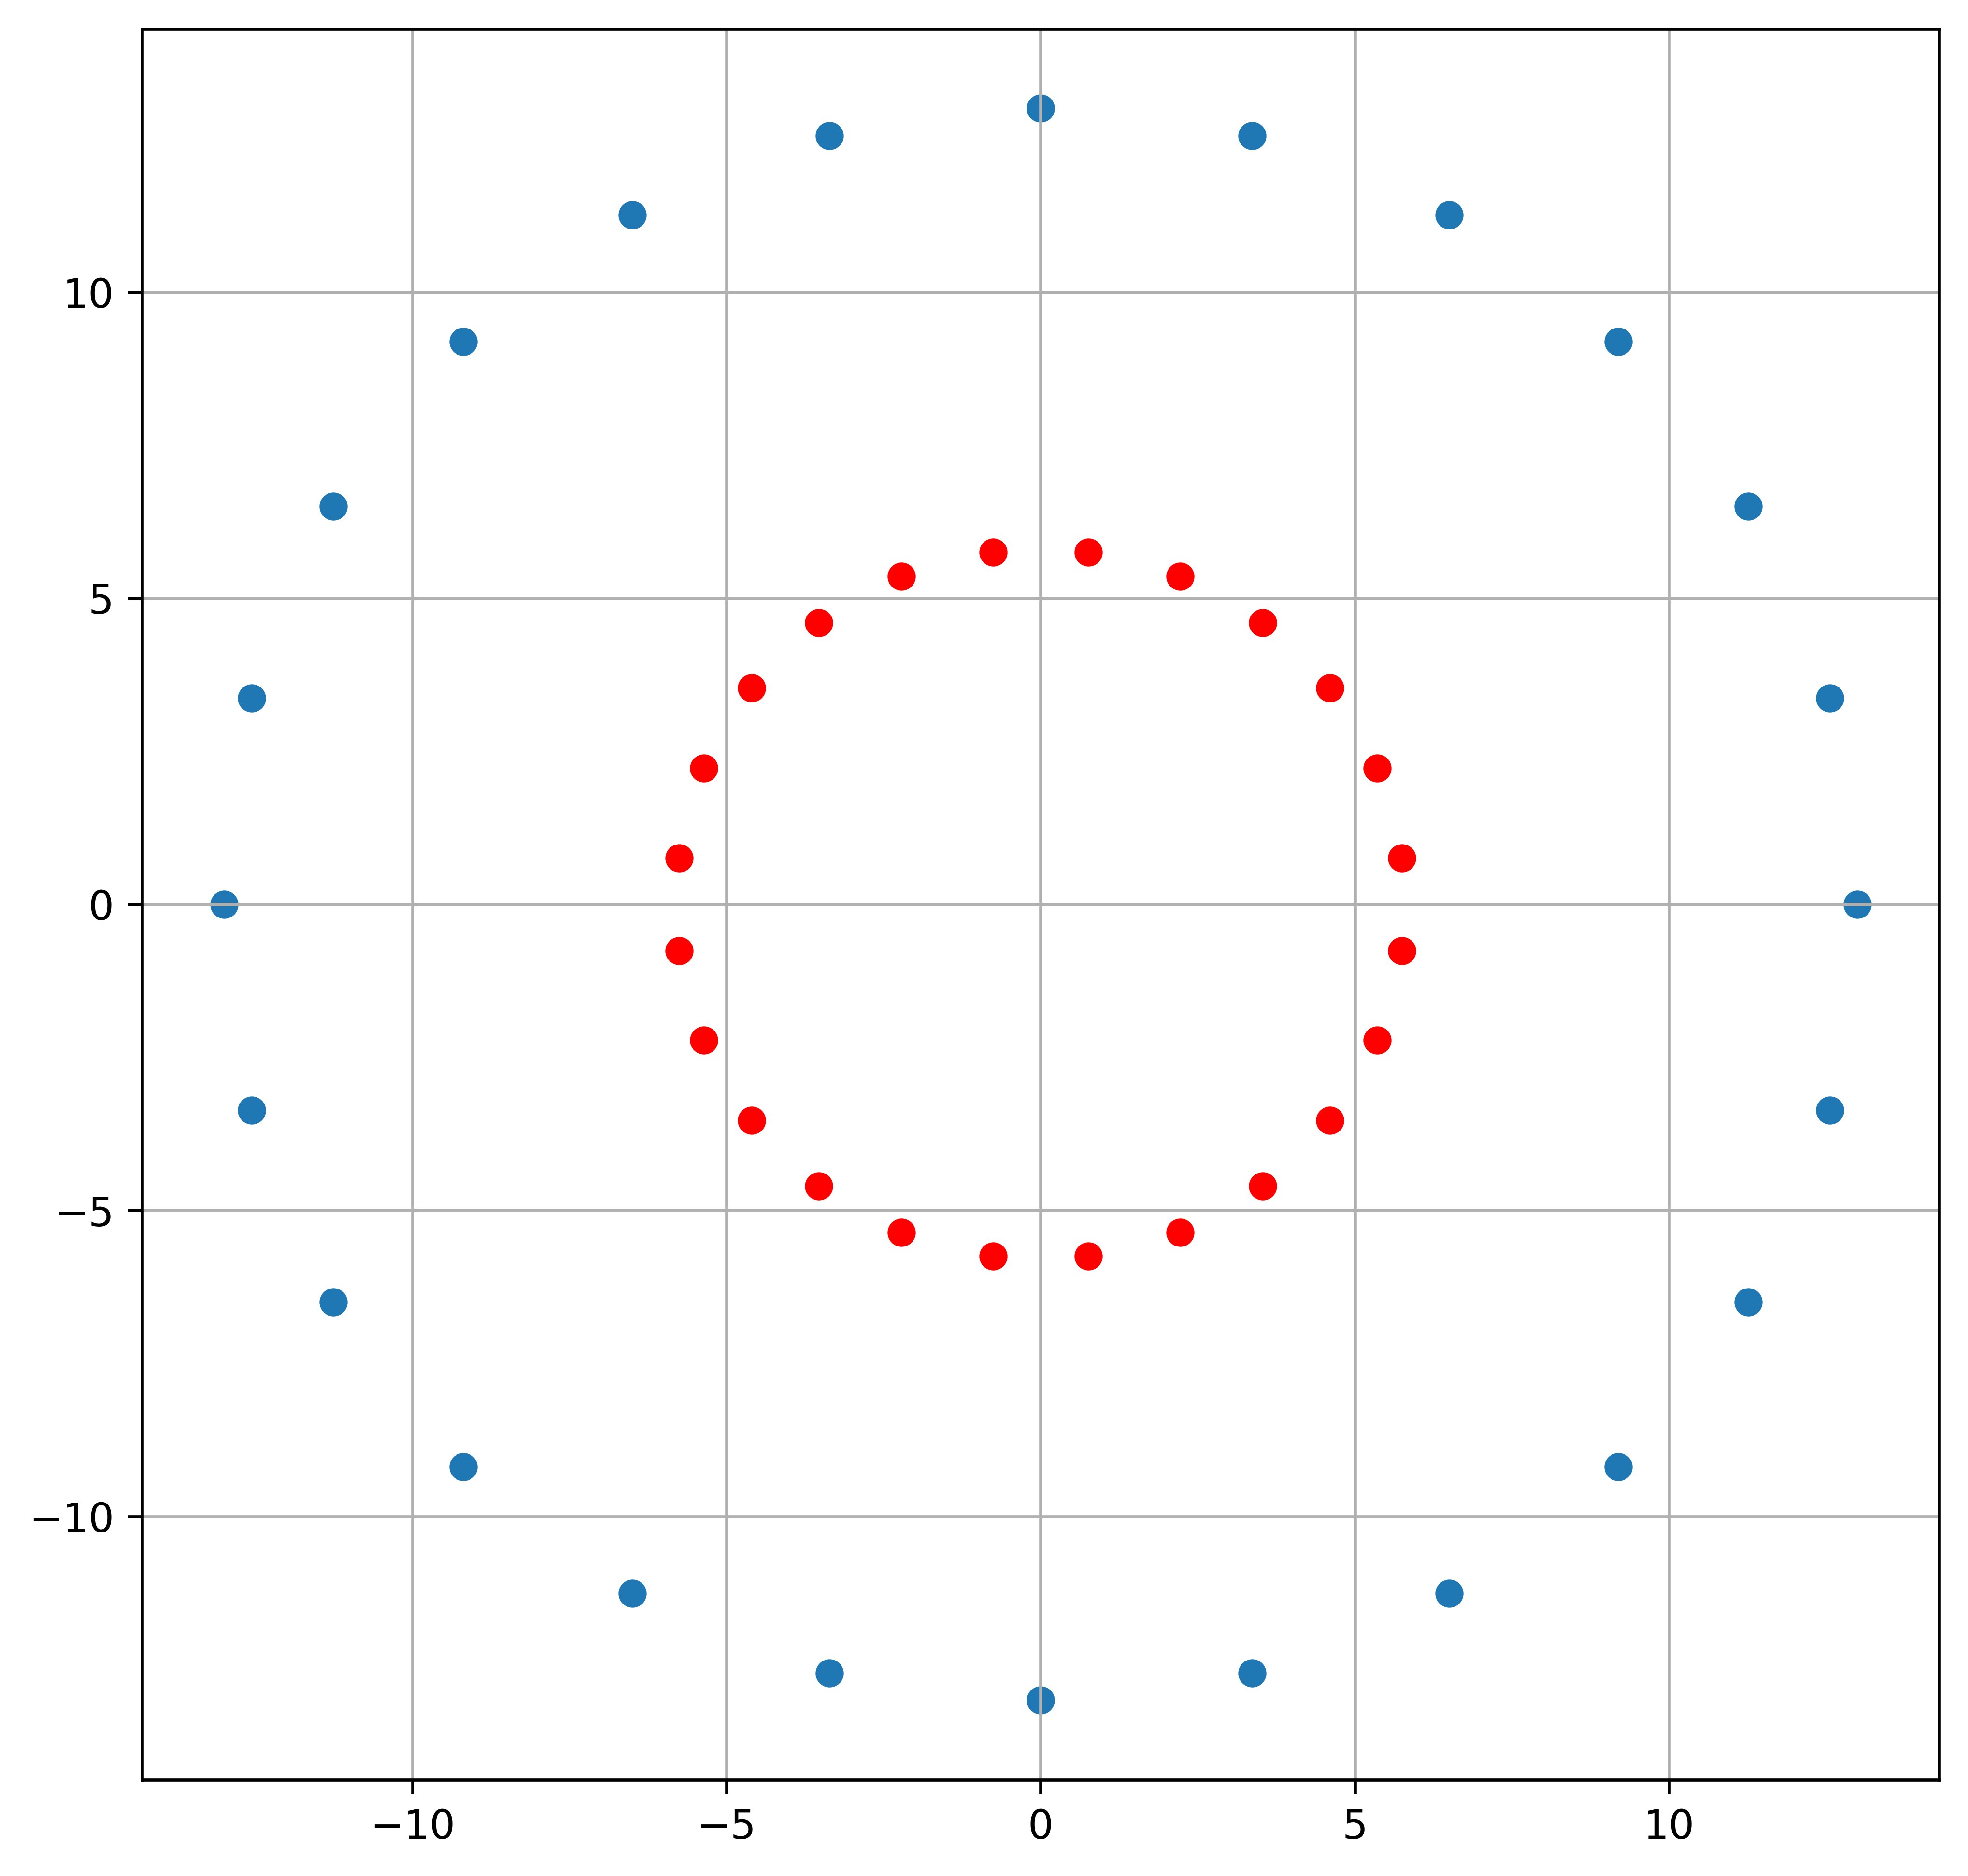

In [5]:
plt.figure(figsize=(8, 8), dpi=600)
plt.scatter(x_outer, y_outer)
plt.scatter(x_inner, y_inner, color='r')
plt.grid()

0.0	13.0	f
-0.76	5.75	b
-3.36	12.56	f
-2.22	5.36	b
-6.5	11.26	f
-3.53	4.6	b
-9.19	9.19	f
-4.6	3.53	b
-11.26	6.5	f
-5.36	2.22	b
-12.56	3.36	f
-5.75	0.76	b
-13.0	0.0	f
-5.75	-0.76	b
-12.56	-3.36	f
-5.36	-2.22	b
-11.26	-6.5	f
-4.6	-3.53	b
-9.19	-9.19	f
-3.53	-4.6	b
-6.5	-11.26	f
-2.22	-5.36	b
-3.36	-12.56	f
-0.76	-5.75	b
-0.0	-13.0	f
0.76	-5.75	b
3.36	-12.56	f
2.22	-5.36	b
6.5	-11.26	f
3.53	-4.6	b
9.19	-9.19	f
4.6	-3.53	b
11.26	-6.5	f
5.36	-2.22	b
12.56	-3.36	f
5.75	-0.76	b
13.0	-0.0	f
5.75	0.76	b
12.56	3.36	f
5.36	2.22	b
11.26	6.5	f
4.6	3.53	b
9.19	9.19	f
3.53	4.6	b
6.5	11.26	f
2.22	5.36	b
3.36	12.56	f
0.76	5.75	b


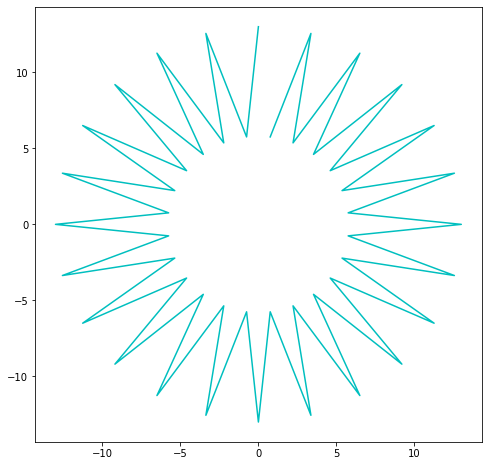

In [6]:
x_final = []
y_final = []
direction = []

for i in range(len(x_outer)):
    x_final.append(x_outer[i])
    x_final.append(x_inner[i])
    direction.append("foreward")
    
    y_final.append(y_outer[i])
    y_final.append(y_inner[i])
    direction.append("backward")


from pprint import pprint
for elem in zip(x_final, y_final, direction):
    print(round(elem[0], 2), round(elem[1], 2), elem[2][0] , sep='\t')

plt.figure(figsize=(8, 8))
plt.plot(x_final, y_final, color='c')